In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data = "Resources/city_data.csv"
ride_data = "Resources/ride_data.csv"

In [3]:
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

In [4]:
city_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [5]:
ride_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [6]:
# Get the columns and the rows that are not null.
city_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Get the columns and the rows that are not null.
city_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Get the columns and the rows that are not null.
ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [9]:
# Get the columns and the rows that are not null.
ride_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [10]:
# Get the data types of each column.
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [11]:
# Get the data types of each column.
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [12]:
# Get the unique values of the type of city.
city_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [13]:
# Get the number of data points from the Urban cities.
sum(city_df["type"]=="Urban")

66

In [14]:
sum(city_df["type"]=="Suburban")

36

In [15]:
sum(city_df["type"]=="Rural")

18

In [16]:
# Merge the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
# Creating scatter plots, make separate dataframes for each city

# Create the Urban city DataFrame.
urban_df = pyber_df[pyber_df["type"] == "Urban"]
suburban_df = pyber_df[pyber_df["type"] == "Suburban"]
rural_df = pyber_df[pyber_df["type"] == "Rural"]

In [18]:
# Get the number of rides for all cities.
urban_ride_ct = urban_df.groupby(["city"]).count()["ride_id"]
suburban_ride_ct = suburban_df.groupby(["city"]).count()["ride_id"]
rural_ride_ct = rural_df.groupby(["city"]).count()["ride_id"]

In [19]:
# Get average fare for all cities
urban_avg_fare = urban_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_df.groupby(["city"]).mean()["fare"]

In [20]:
# Get average driver count
urban_driver_ct = urban_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_ct = suburban_df.groupby(["city"]).mean()["driver_count"]
rural_driver_ct = rural_df.groupby(["city"]).mean()["driver_count"]

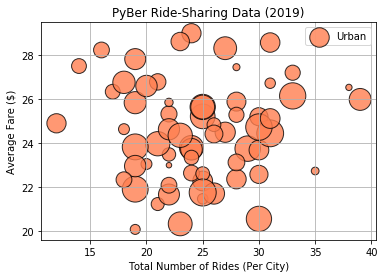

In [21]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_ct,
      urban_avg_fare,
      s=10*urban_driver_ct, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

# Add a title
plt.title("PyBer Ride-Sharing Data (2019)")

# Add labels
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

# Add grid lines
plt.grid(True)

# Add the legend.
plt.legend()

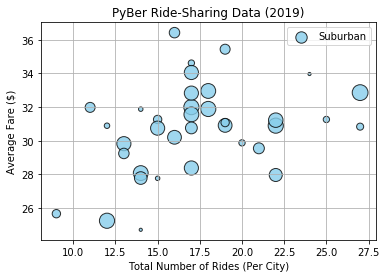

In [22]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_ct,
      suburban_avg_fare,
      s=10*suburban_driver_ct, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

# Add a title
plt.title("PyBer Ride-Sharing Data (2019)")

# Add labels
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

# Add grid lines
plt.grid(True)

# Add the legend.
plt.legend()

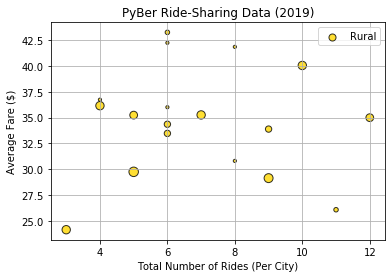

In [23]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_ct,
      rural_avg_fare,
      s=10*rural_driver_ct, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Add a title
plt.title("PyBer Ride-Sharing Data (2019)")

# Add labels
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

# Add grid lines
plt.grid(True)

# Add the legend.
plt.legend()

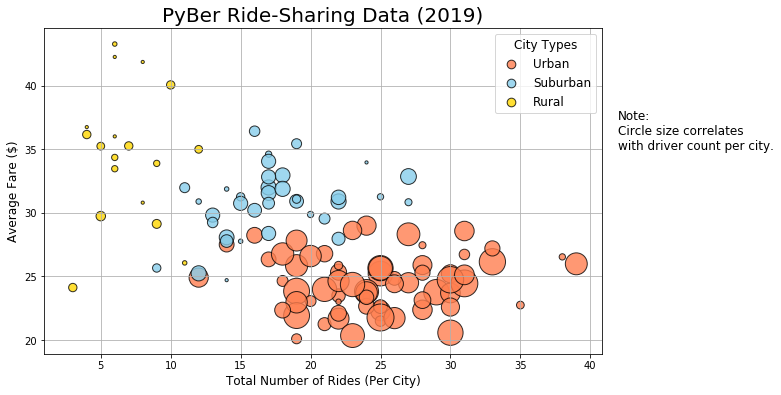

In [24]:
# Combine all three scatter charts into one chart

plt.subplots(figsize=(10,6))

plt.scatter(urban_ride_ct,
      urban_avg_fare,
      s=10*urban_driver_ct, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_ct,
      suburban_avg_fare,
      s=10*suburban_driver_ct, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_ct,
      rural_avg_fare,
      s=10*rural_driver_ct, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Add titles, labels, and gridlines
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

# Save the figure. Make analysis folder to accommodate file path
plt.savefig("analysis/Fig1.png")

# Show the Plot
plt.show()

In [25]:
# Get summary statistics.
urban_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [26]:
# Get summary statistics.
suburban_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [27]:
# Get summary statistics.
rural_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [28]:
# Get summary statistics.
urban_ride_ct.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [29]:
# Get summary statistics.
suburban_ride_ct.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [30]:
# Get summary statistics.
rural_ride_ct.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [31]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_ct.mean(),2), round(suburban_ride_ct.mean(),2), round(rural_ride_ct.mean(),2)

(24.62, 17.36, 6.94)

In [32]:
# Calculate the median of the ride count for each city type.
round(urban_ride_ct.median(),2), round(suburban_ride_ct.median(),2), round(rural_ride_ct.median(),2)

(24.0, 17.0, 6.0)

In [33]:
# Calculate the mode of the ride count for each city type.
round(urban_ride_ct.mode(),2), round(suburban_ride_ct.mode(),2), round(rural_ride_ct.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [34]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [35]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_ct = np.mean(urban_ride_ct)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_ct:.2f}.")

median_urban_ride_ct = np.median(urban_ride_ct)
print(f"The median for the ride counts for urban trips is {median_urban_ride_ct}.")

mode_urban_ride_ct = sts.mode(urban_ride_ct)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_ct}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [36]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_ct = np.mean(suburban_ride_ct)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_ct:.2f}.")

median_suburban_ride_ct = np.median(suburban_ride_ct)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_ct}.")

mode_suburban_ride_ct = sts.mode(suburban_ride_ct)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_ct}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [37]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_ct = np.mean(rural_ride_ct)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_ct:.2f}.")

median_rural_ride_ct = np.median(rural_ride_ct)
print(f"The median for the ride counts for rural trips is {median_rural_ride_ct}.")

mode_rural_ride_ct = sts.mode(rural_ride_ct)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_ct}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [38]:
# Summary statistics for the fare by city type

# Get the fares for the urban, suburban, and rural cities.
urban_fares = urban_df["fare"]
suburban_fares = suburban_df["fare"]
rural_fares = rural_df["fare"]

In [39]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [40]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [41]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [42]:
# Summary statistics for the fare by driver count
# Get the driver count data from all cities.
urban_drivers = urban_df['driver_count']
suburban_drivers = suburban_df['driver_count']
rural_drivers = rural_df['driver_count']

In [43]:
# Calculate the measures of central tendency for the driver count in urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean fare price for urban trips is ${mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median fare price for urban trips is ${median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode fare price for urban trips is {mode_urban_drivers}.")

The mean fare price for urban trips is $36.68.
The median fare price for urban trips is $37.00.
The mode fare price for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [44]:
# Calculate the measures of central tendency for the driver count in suburban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean fare price for suburban trips is ${mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median fare price for suburban trips is ${median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode fare price for suburban trips is {mode_suburban_drivers}.")

The mean fare price for suburban trips is $13.71.
The median fare price for suburban trips is $16.00.
The mode fare price for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [45]:
# Calculate the measures of central tendency for the driver count in rural cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean fare price for rural trips is ${mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median fare price for rural trips is ${median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode fare price for rural trips is {mode_rural_drivers}.")

The mean fare price for rural trips is $4.30.
The median fare price for rural trips is $4.00.
The mode fare price for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


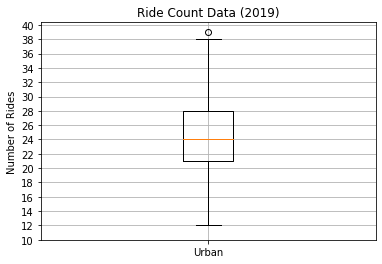

In [46]:
# Create a box-and-whisker plot for the urban cities ride count.

x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_ct, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

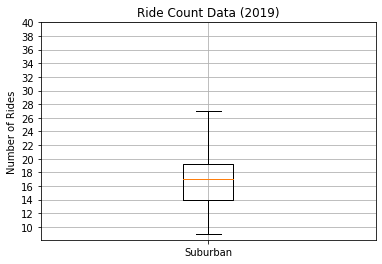

In [47]:
# Create a box-and-whisker plot for the suburban cities ride count.

x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_ct, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

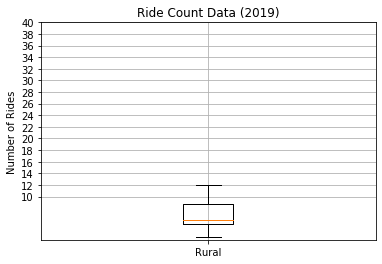

In [48]:
# Create a box-and-whisker plot for the rural cities ride count.

x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_ct, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

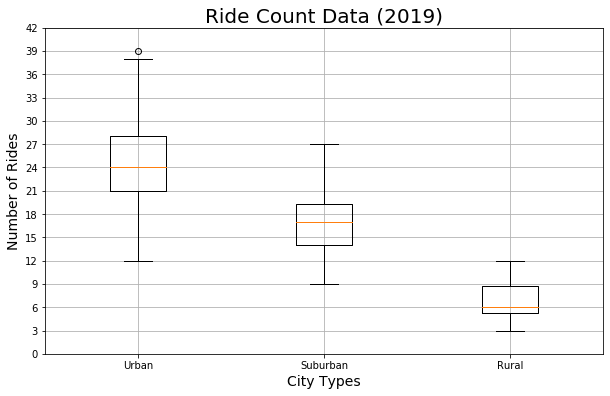

In [49]:
# Add all ride count box-and-whisker plots to the same graph.

x_labels = ["Urban", "Suburban","Rural"]
ride_ct_data = [urban_ride_ct, suburban_ride_ct, rural_ride_ct]
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)

ax.boxplot(ride_ct_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))

ax.grid()

# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [50]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_ct[urban_ride_ct==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


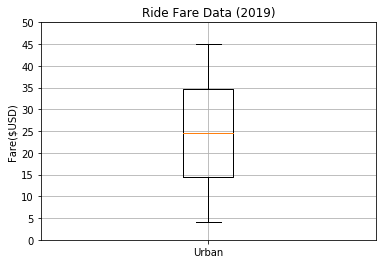

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [51]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

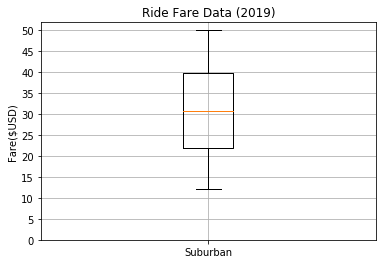

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [52]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

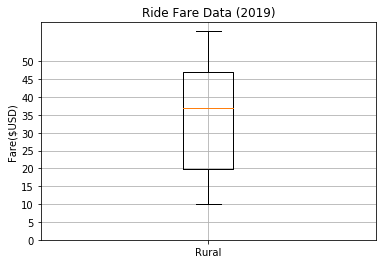

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [53]:
# Create a box-and-whisker plot for the rural fare data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

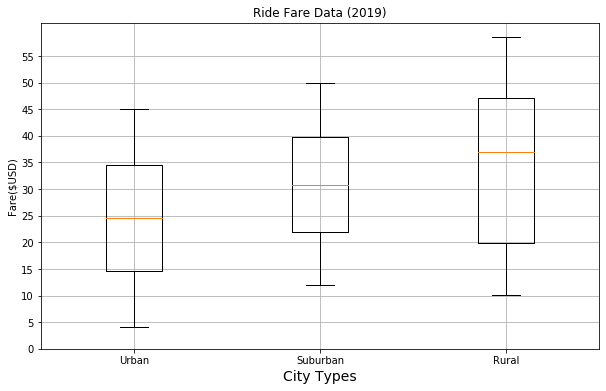

In [54]:
# Create a box-and-whisker plot that has all three city types’ fare data in one plot
x_labels = ["Urban", "Suburban", "Rural"]
fare_data = [urban_fares,suburban_fares,rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(fare_data, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_xlabel("City Types",fontsize=14)
ax.set_yticks(np.arange(0, 56, step=5.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

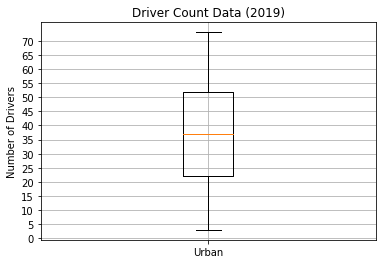

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [55]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 75, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_drivers.describe()

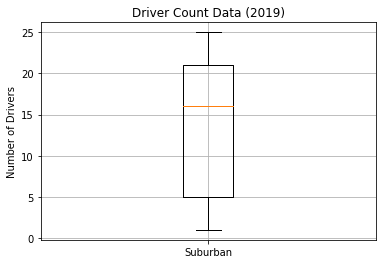

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [56]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 30, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_drivers.describe()

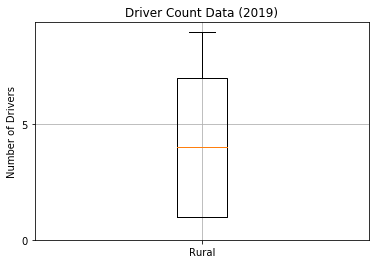

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [57]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 10, step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_drivers.describe()

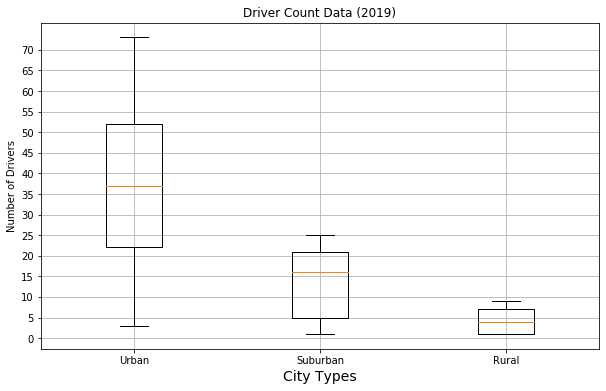

In [58]:
# Create a box-and-whisker plot that has all three city types’ drivier count data in one plot
x_labels = ["Urban", "Suburban", "Rural"]
driver_ct_data = [urban_drivers,suburban_drivers,rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(driver_ct_data, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_xlabel("City Types",fontsize=14)
ax.set_yticks(np.arange(0, 75, step=5.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [59]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [60]:
# Get the sum of all the fares.
total_fares = pyber_df["fare"].sum()
total_fares

63538.64

In [61]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [62]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_df.groupby(["type"]).sum()["fare"] / pyber_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

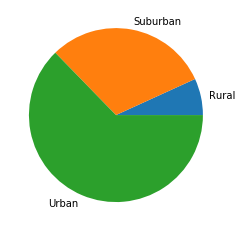

In [63]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()

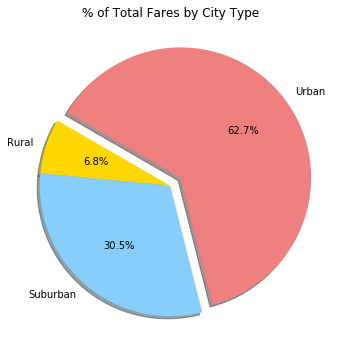

In [64]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)

# Add title
plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/Fig5.png")

# Show Figure
plt.show()

In [65]:
pyber_df.groupby(["type"])

In [66]:
pyber_df.groupby(["type"]).count()["ride_id"]

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [67]:
pyber_df["ride_id"].count()

2375

In [68]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_df.groupby(["type"]).count()["ride_id"] / pyber_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

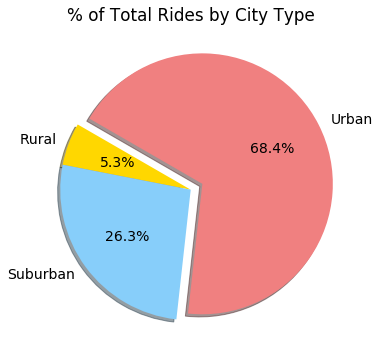

In [69]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))

plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)

plt.title("% of Total Rides by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/Fig6.png")

# Show Figure
plt.show()

In [70]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * pyber_df.groupby(["type"]).sum()["driver_count"] / pyber_df["driver_count"].sum()
driver_percents

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

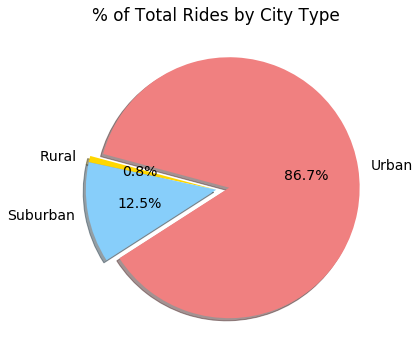

In [71]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))

plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)

plt.title("% of Total Rides by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/Fig7.png")

# Show Figure
plt.show()

In [72]:
# Part 1.1: Create variable to hold df values for summary
total_rides1 = pyber_df.groupby(["type"]).count()["ride_id"].to_frame()
total_drivers1 = city_df.groupby(["type"])['driver_count'].sum().to_frame()
total_fares1 = pyber_df.groupby(["type"]).sum()['fare'].to_frame()
ave_fare_per_ride1 = pyber_df.groupby(["type"]).mean()["fare"].to_frame()

In [73]:
# Part 1.2: Format df values for summary
total_rides = total_rides1["ride_id"].map('{:,}'.format)
total_drivers = total_drivers1['driver_count'].map('{:,}'.format)
total_fares = total_fares1['fare'].map('${:,.2f}'.format)
ave_fare_per_ride = ave_fare_per_ride1["fare"].map('${:,.2f}'.format)

In [74]:
# Part 1.3: Merge dataframes by type
pyber_merge1 = pd.merge(total_rides, total_drivers, how="left", on=["type"])
pyber_merge1

,ride_id,driver_count
type,,
Rural,125,78
Suburban,625,490
Urban,"1,625","2,405"


In [75]:
pyber_merge2 = pd.merge(total_fares, ave_fare_per_ride, how="left", on=["type"])
pyber_merge2

,fare_x,fare_y
type,,
Rural,"$4,327.93",$34.62
Suburban,"$19,356.33",$30.97
Urban,"$39,854.38",$24.53


In [76]:
pyber_merge3 = pd.merge(pyber_merge1,pyber_merge2,how="left", on=["type"])
pyber_merge3

,ride_id,driver_count,fare_x,fare_y
type,,,,
Rural,125,78,"$4,327.93",$34.62
Suburban,625,490,"$19,356.33",$30.97
Urban,"1,625","2,405","$39,854.38",$24.53


In [77]:
ave_fare_per_driver = pyber_df.groupby(["type"]).sum()["fare"] / city_df.groupby(["type"])['driver_count'].sum()
ave_fare_per_driver = ave_fare_per_driver.map('${:,.2f}'.format)

In [78]:
ave_fare_df =ave_fare_per_driver.to_frame()

In [79]:
# Create summary dataframe
pyber_summary = pd.merge(pyber_merge3,ave_fare_df,how="left", on=["type"])
pyber_summary = pyber_summary.rename(columns = {'ride_id':'Total Rides','driver_count':'Total Drivers','fare_x':'Total Fares','fare_y':'Average Fare per Ride',0:'Average Fare per Driver'})
pyber_summary.index.names = ['']
pyber_summary

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [80]:
# Part 2.1: Rename columns
pyber_df = pyber_df.rename(columns ={'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})
pyber_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [81]:
# Part 2.2: Set the index to the Date column.
pyber_df = pyber_df.set_index("Date")
pyber_df

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [82]:
# Part 2.3: Create a new DataFrame for fares and include only the Date, City Type, and Fare columns
# using the copy() method on the merged DataFrame.

pyber_df2 = pyber_df[['City Type', 'Fare']].copy()
pyber_df2

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [83]:
# Part 2.4: Drop the extra Date column.
# Part 2.5: Set the index to the datetime data type.
pyber_df2.index = pd.to_datetime(pyber_df2.index)
pyber_df2.index.dtype

dtype('<M8[ns]')

In [84]:
# Part 2.6: Check the DataFrame using the info() method to make sure the index is a datetime data type.
pyber_df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [85]:
# Part 2.7: Calculate the sum() of fares by the type of city and date using groupby() to create a new DataFrame.
fares_by_type_df = pyber_df2.groupby(["Date","City Type"]).sum()
fares_by_type_df

,,Fare
Date,City Type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [86]:
# Part 2.8: Reset index, keep columns
fares_by_type_df.reset_index(inplace=True)

In [87]:
# Part 2.9: Create Pivot Table DF with Index: Date, and Columns = 'City Type'

# Set date as index
pivot_df = pd.pivot_table(fares_by_type_df, index='Date',columns='City Type')
pivot_df

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:49   NaN      NaN  18.45
2019-05-08 07:29:01   NaN      NaN  18.55
2019-05-08 11:38:35   NaN      NaN  19.77
2019-05-08 13:10:18   NaN      NaN  18.04

[2375 rows x 3 columns]

In [88]:
pivot_df.isnull().sum()

      City Type
Fare  Rural        2250
      Suburban     1750
      Urban         750
dtype: int64

In [89]:
# Part 2.10: Create a new DataFrame from the pivot table DataFrame on the given dates '2019-01-01':'2019-04-28' using loc
dates_df = pivot_df.loc['2019-01-01':'2019-04-28']
dates_df

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-04-28 14:28:36   NaN      NaN  11.46
2019-04-28 16:29:16   NaN      NaN  36.42
2019-04-28 17:26:52   NaN      NaN  31.43
2019-04-28 17:38:09   NaN    34.87    NaN
2019-04-28 19:35:03   NaN    16.96    NaN

[2196 rows x 3 columns]

In [90]:
# Part 2.11: Create a new DataFrame by setting the DataFrame you created in Step 10
# with resample() in weekly bins, and calculate the sum() of the fares for each week.

df_resampled = dates_df.resample('W').sum()
df_resampled

Fare                  
City Type    Rural Suburban    Urban
Date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94
2019-02-10  115.80   974.34  2162.64
2019-02-17   95.82  1045.50  2235.07
2019-02-24  419.06  1412.74  2466.29
2019-03-03  175.14   858.46  2218.20
2019-03-10  303.94   925.27  2470.93
2019-03-17  163.39   906.20  2044.42
2019-03-24  189.76  1122.20  2368.37
2019-03-31  199.42  1045.06  1942.77
2019-04-07  501.24  1010.73  2356.70
2019-04-14  269.79   784.82  2390.72
2019-04-21  214.14  1149.27  2303.80
2019-04-28  191.85  1357.75  2238.29

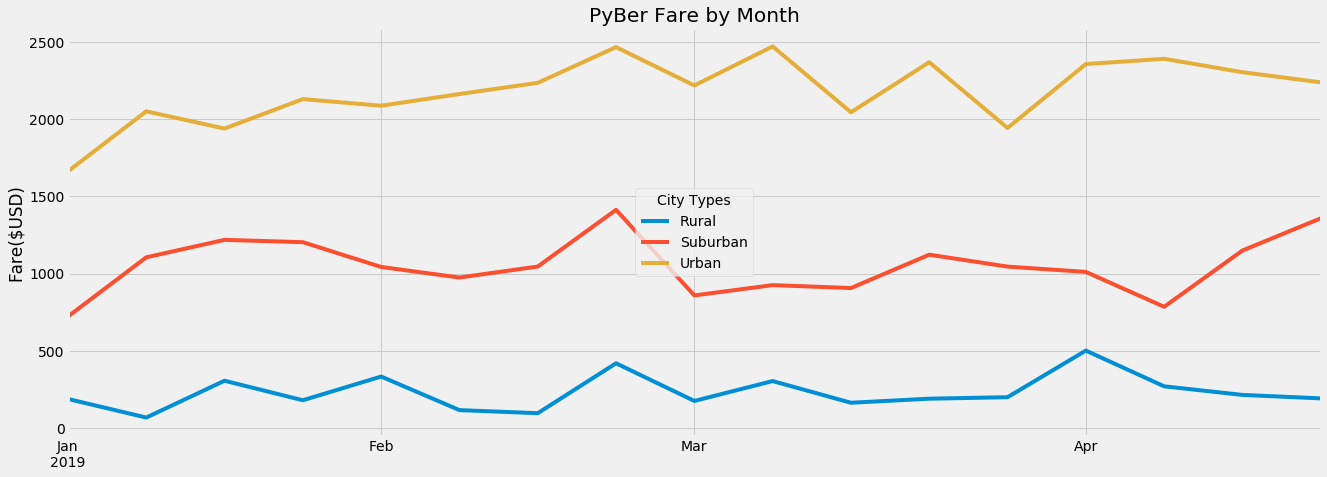

<Figure size 2880x720 with 0 Axes>

In [91]:
# Part 2.12: Using the object-oriented interface method, plot the DataFrame you created in Step 11 using the df.plot() function

# Use the graph style fivethirtyeight.
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(20, 7))
df_resampled.plot(ax=ax)
plt.axis("On")

# Add a title.
plt.title("PyBer Fare by Month")

# Add x- and y-axes labels according to the final figure.
plt.xlabel("")
plt.ylabel("Fare($USD)")
plt.legend(['Rural','Suburban', 'Urban'], loc="center", title="City Types")
# Make the figure size large enough so it’s not too small.
plt.figure(figsize=(40, 10))

# Save the figure to the “analysis” folder.
fig.savefig("analysis/Final_Analysis.png")